Problem Defination


Create a predictive model will help the teacher to identify the performance of the students.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,recall_score
import warnings
warnings.filterwarnings('ignore')

In [86]:
data=pd.read_csv('tae.csv')
data

,1,23,3,1.1,19,3.1
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3
...,...,...,...,...,...,...
145,2,3,2,2,26,1
146,2,10,3,2,12,1
147,1,18,7,2,48,1
148,2,22,1,2,51,1


Domain Analysis

In [88]:
data.rename({'1':'Native_teacher','23':'Instructor','3':'Course','1.1':'Semester','19':'Class_size','3.1':'Performance'},axis=1,inplace=True)
data

,Native_teacher,Instructor,Course,Semester,Class_size,Performance
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3
...,...,...,...,...,...,...
145,2,3,2,2,26,1
146,2,10,3,2,12,1
147,1,18,7,2,48,1
148,2,22,1,2,51,1


In [90]:
data.head()

,Native_teacher,Instructor,Course,Semester,Class_size,Performance
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


In [92]:
data.tail()

,Native_teacher,Instructor,Course,Semester,Class_size,Performance
145,2,3,2,2,26,1
146,2,10,3,2,12,1
147,1,18,7,2,48,1
148,2,22,1,2,51,1
149,2,2,10,2,27,1


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Native_teacher  150 non-null    int64
 1   Instructor      150 non-null    int64
 2   Course          150 non-null    int64
 3   Semester        150 non-null    int64
 4   Class_size      150 non-null    int64
 5   Performance     150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [96]:
data.describe()

,Native_teacher,Instructor,Course,Semester,Class_size,Performance
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.813333,13.580000,8.140000,1.853333,27.926667,2.013333
std,0.390949,6.805318,7.034937,0.354958,12.916405,0.819123
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.500000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


Data Preprocesssing

In [98]:
data.isnull().sum()

Native_teacher    0
Instructor        0
Course            0
Semester          0
Class_size        0
Performance       0
dtype: int64

In [100]:
data['Course'].value_counts()

Course
3     44
2     16
1     14
15    10
17    10
11     9
7      7
5      5
8      4
25     3
9      3
21     3
13     3
22     3
16     3
18     2
6      2
14     1
12     1
19     1
23     1
26     1
24     1
20     1
4      1
10     1
Name: count, dtype: int64

In [102]:
data['Native_teacher'].value_counts()

Native_teacher
2    122
1     28
Name: count, dtype: int64

In [104]:
data['Semester'].value_counts()

Semester
2    128
1     22
Name: count, dtype: int64

In [106]:
data['Class_size'].value_counts()

Class_size
20    11
19    10
27     7
42     7
17     6
10     6
38     6
37     6
31     6
29     6
24     5
13     4
11     4
21     4
30     4
48     3
39     3
23     3
22     3
25     3
51     3
36     3
18     2
14     2
15     2
12     2
45     2
28     2
49     2
43     2
9      2
58     2
55     2
46     2
33     2
7      1
5      1
44     1
16     1
54     1
66     1
3      1
34     1
32     1
35     1
26     1
Name: count, dtype: int64

In [33]:
data['Instructor'].value_counts()

Instructor
23    16
13    14
22    12
7     11
15     8
9      8
10     8
18     8
6      8
14     8
5      6
20     5
8      5
16     4
17     4
1      4
2      4
25     4
11     3
21     2
4      2
12     2
3      2
24     1
19     1
Name: count, dtype: int64

In [108]:
data['Performance'].value_counts()

Performance
3    51
2    50
1    49
Name: count, dtype: int64

In [110]:
data.shape

(150, 6)

In [112]:
data.columns

Index(['Native_teacher', 'Instructor', 'Course', 'Semester', 'Class_size',
       'Performance'],
      dtype='object')

Exploratory Data Analysis

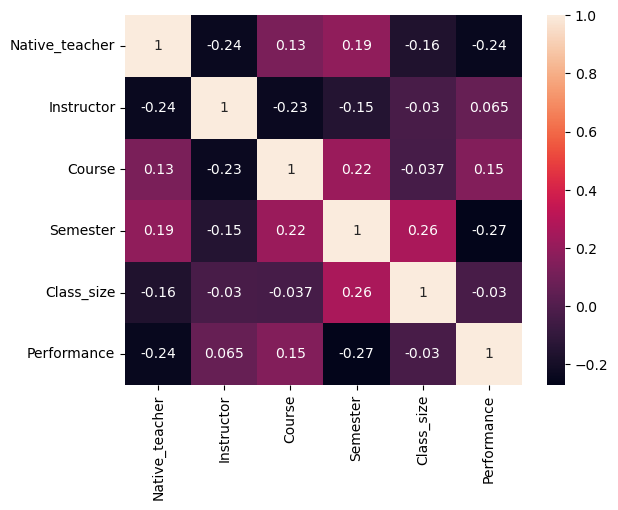

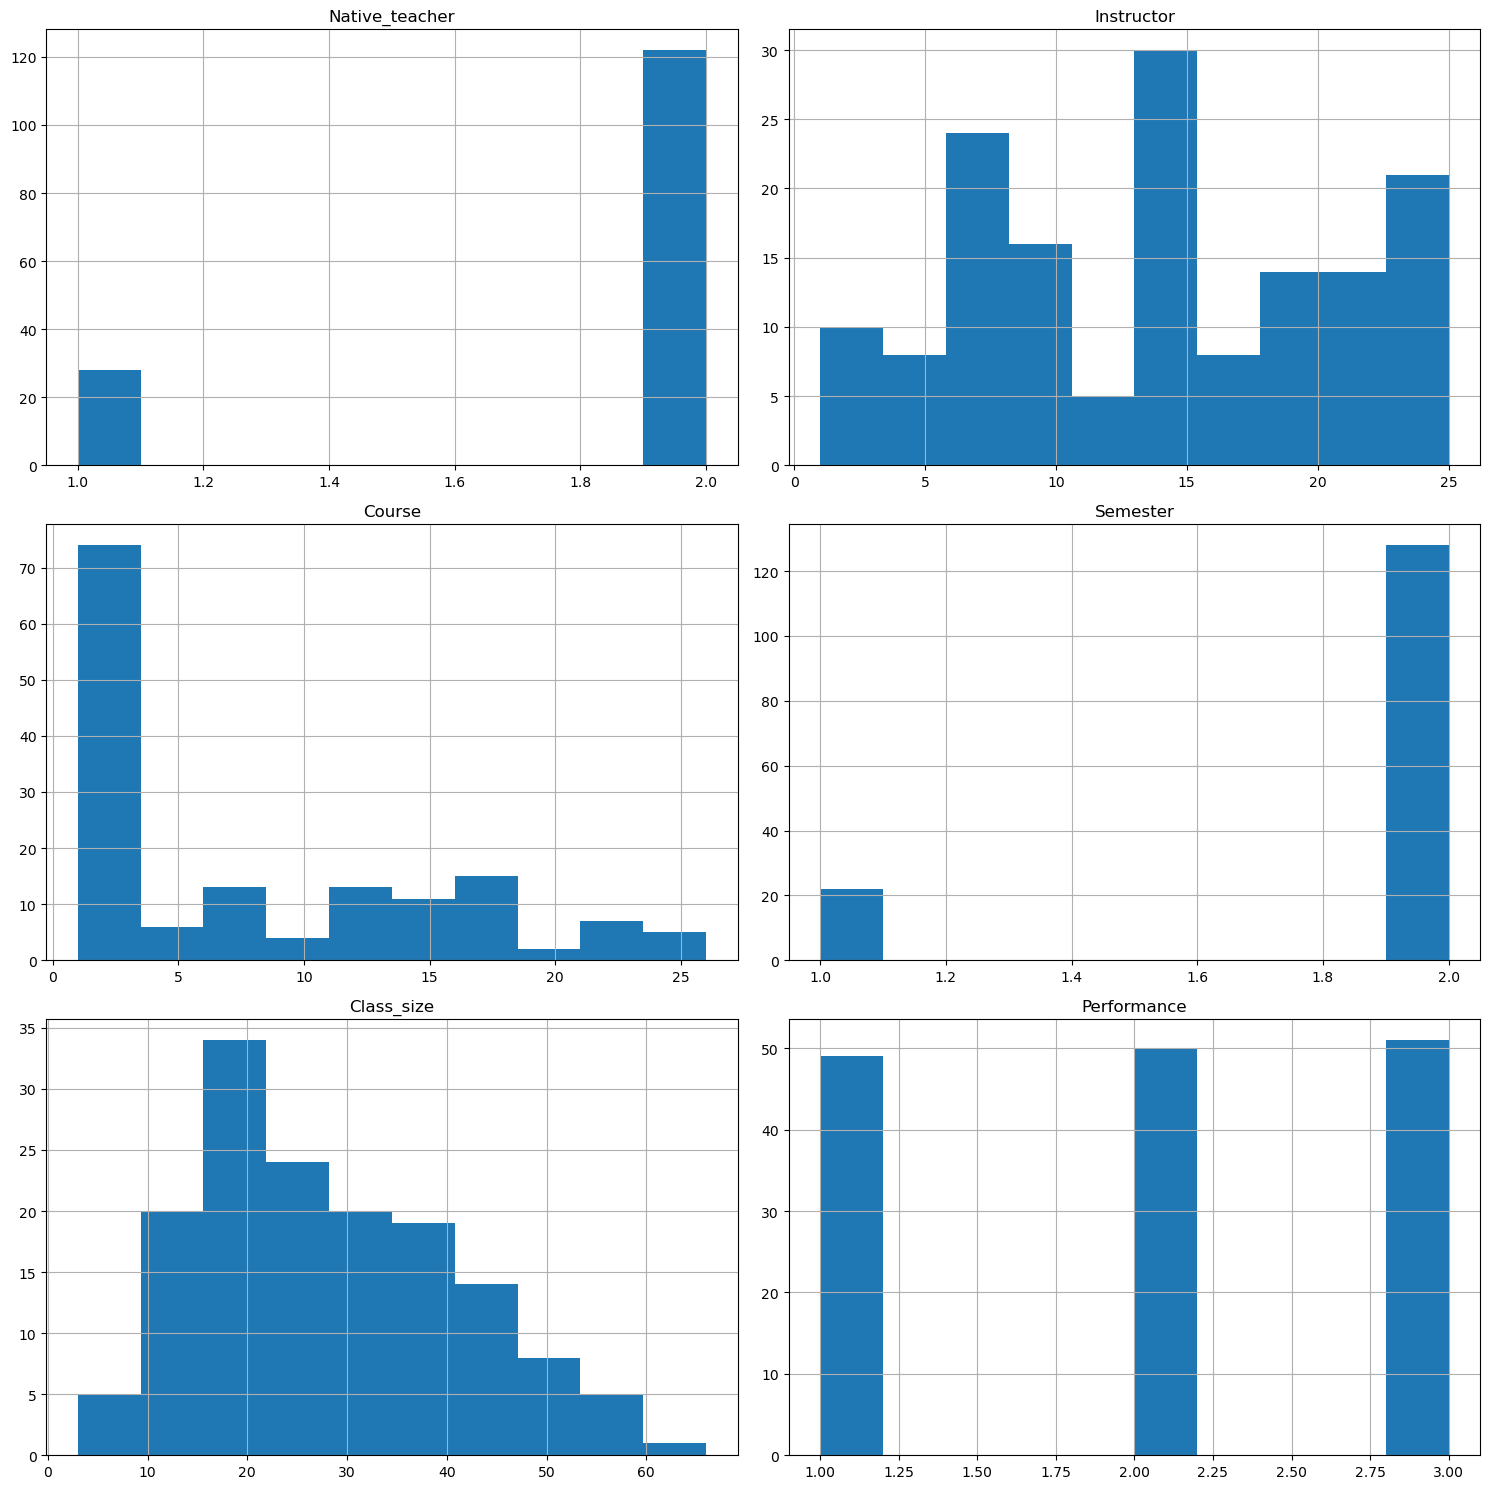

In [137]:
# Histogram for Numeric Column
sns.heatmap(data.corr(),annot=True)
data.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

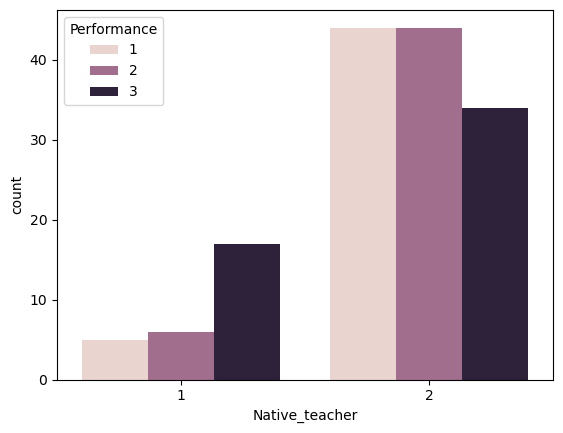

In [116]:
sns.countplot(x='Native_teacher',data=data,hue='Performance')
plt.show()

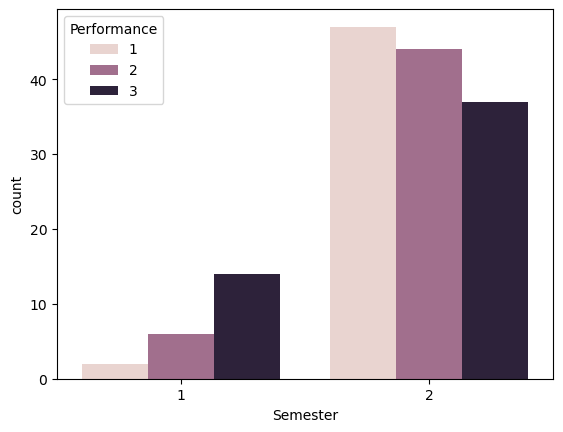

In [122]:
sns.countplot(x='Semester',data=data,hue='Performance')
plt.show()

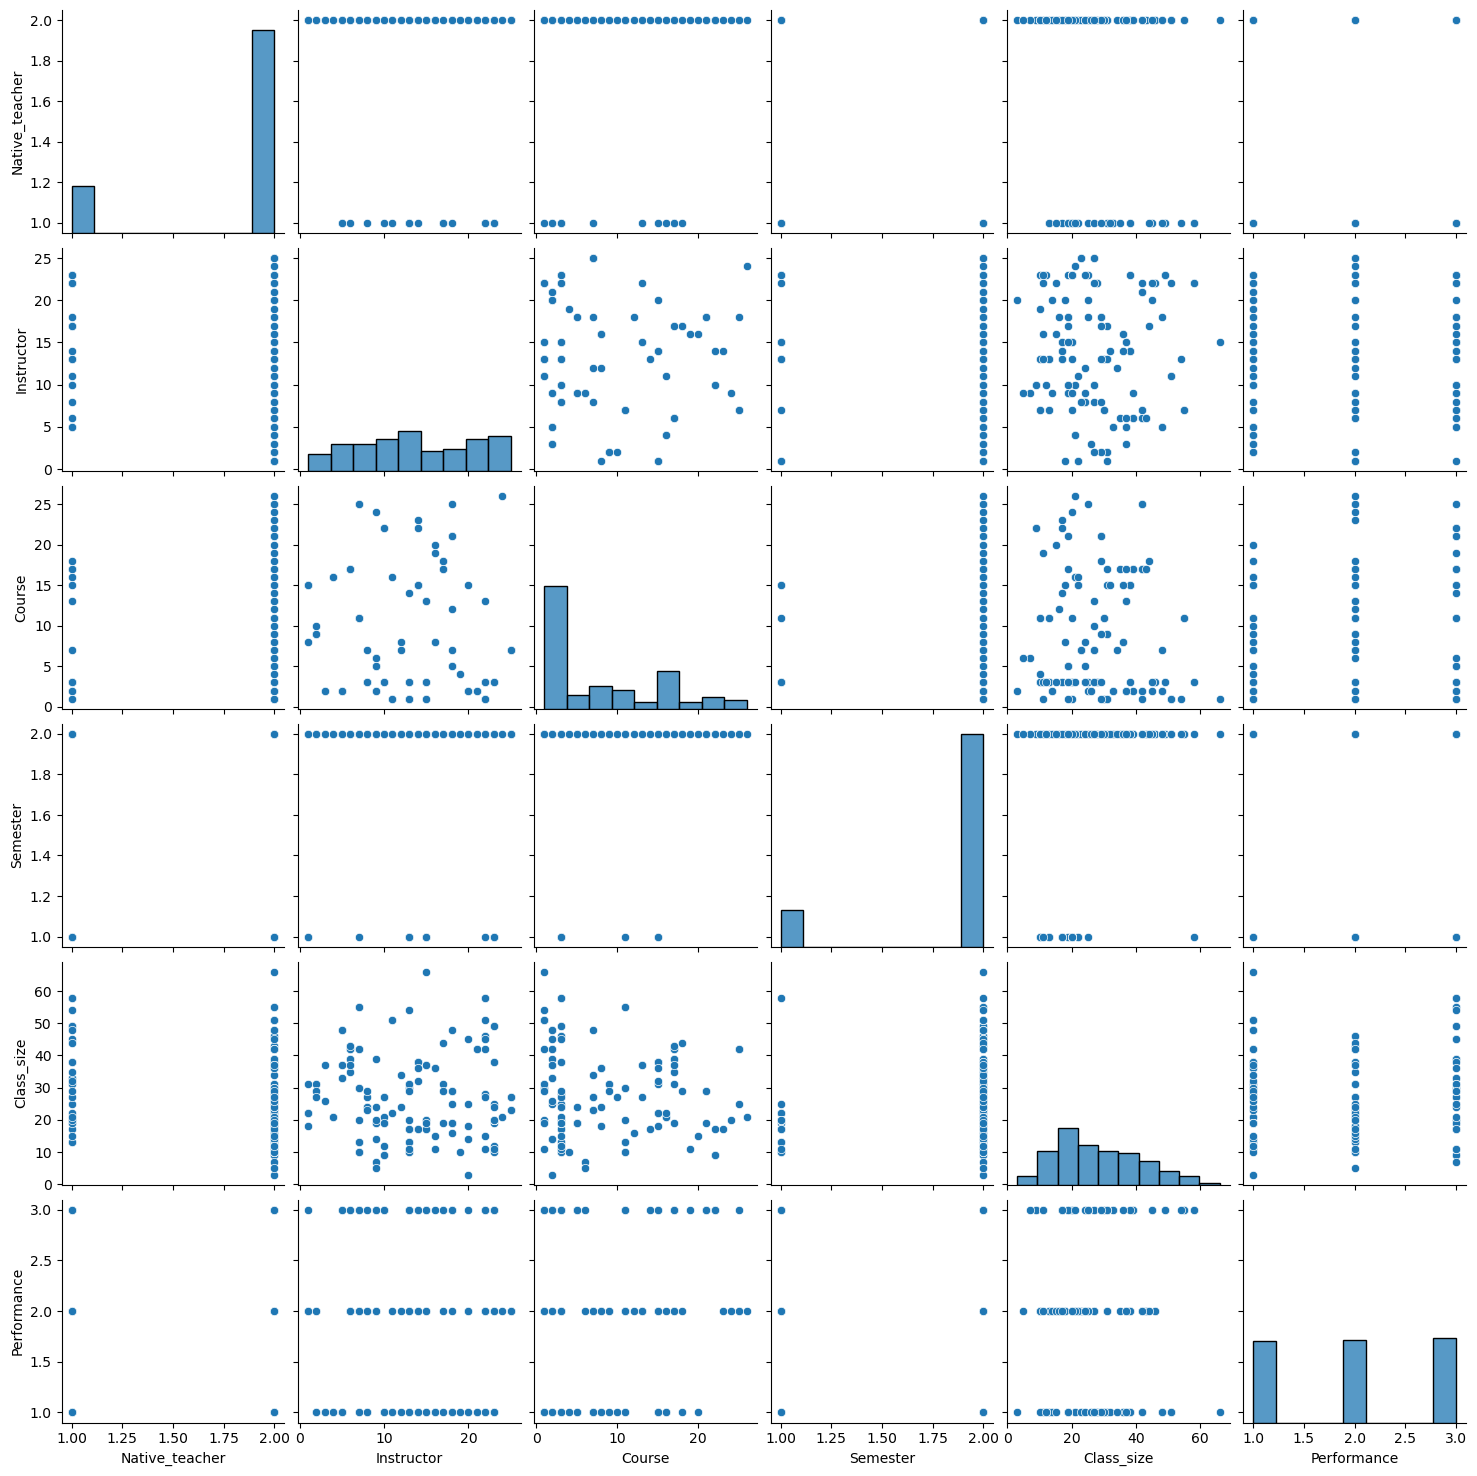

In [125]:
sns.pairplot(data)
plt.show()

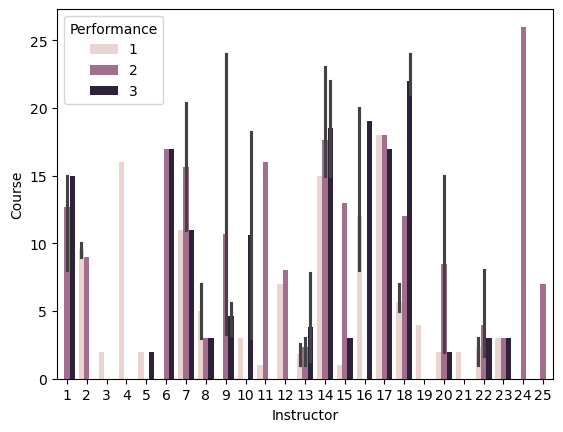

In [58]:
sns.barplot(x='Instructor',y='Course',data=data,hue='Performance')
plt.show()

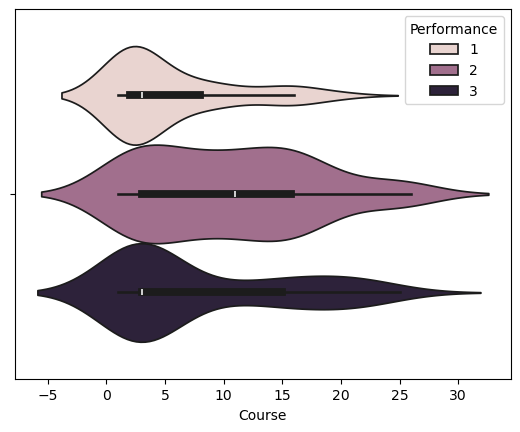

In [127]:
sns.violinplot(x='Course',data=data,hue='Performance')
plt.show()

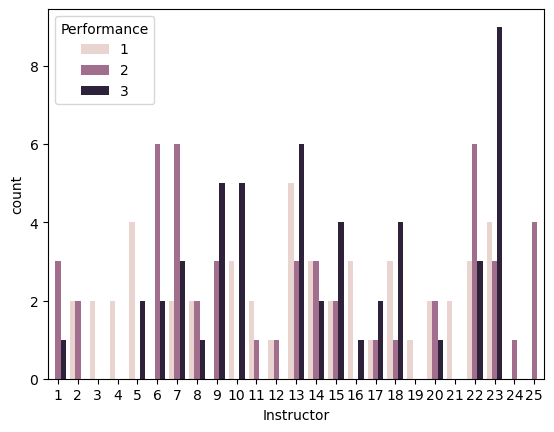

In [129]:
sns.countplot(x='Instructor',data=data,hue='Performance')
plt.show()

Outlier handling

In [140]:
from scipy import stats
IQR = stats.iqr(data.Class_size, interpolation = 'midpoint')
IQR

18.0

In [142]:
Q1=data.Class_size.quantile(0.25)
Q3=data.Class_size.quantile(0.75)
min_limit=Q1 - 1.5*IQR
max_limit=Q3 + 1.5*IQR

In [144]:
data.loc[data['Class_size']<min_limit]

,Native_teacher,Instructor,Course,Semester,Class_size,Performance


In [146]:
data.loc[data['Class_size']>max_limit]

,Native_teacher,Instructor,Course,Semester,Class_size,Performance
115,2,15,1,2,66,1


In [148]:
data.loc[data['Class_size']>max_limit,'Class_size']=np.median(data.Class_size)
data

,Native_teacher,Instructor,Course,Semester,Class_size,Performance
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3
...,...,...,...,...,...,...
145,2,3,2,2,26,1
146,2,10,3,2,12,1
147,1,18,7,2,48,1
148,2,22,1,2,51,1


In [150]:
data.loc[data['Course']>max_limit,'Class_size']=np.median(data.Course)
data

,Native_teacher,Instructor,Course,Semester,Class_size,Performance
0,2,15,3,1,17.0,3
1,1,23,3,2,49.0,3
2,1,5,2,2,33.0,3
3,2,7,11,2,55.0,3
4,2,23,3,1,20.0,3
...,...,...,...,...,...,...
145,2,3,2,2,26.0,1
146,2,10,3,2,12.0,1
147,1,18,7,2,48.0,1
148,2,22,1,2,51.0,1


In [152]:
1/150 *100

0.6666666666666667

Model Creation

In [157]:
X = data.drop(columns = ['Performance']) # Independent variables
y = data['Performance']

In [159]:
X

,Native_teacher,Instructor,Course,Semester,Class_size
0,2,15,3,1,17.0
1,1,23,3,2,49.0
2,1,5,2,2,33.0
3,2,7,11,2,55.0
4,2,23,3,1,20.0
...,...,...,...,...,...
145,2,3,2,2,26.0
146,2,10,3,2,12.0
147,1,18,7,2,48.0
148,2,22,1,2,51.0


In [161]:
y

0      3
1      3
2      3
3      3
4      3
      ..
145    1
146    1
147    1
148    1
149    1
Name: Performance, Length: 150, dtype: int64

In [167]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)

In [188]:
from sklearn.preprocessing import StandardScaler

def preprocess_inputs(data):
    df = data.copy()
    
    # Split df into X and y
    X = data.drop('Performance', axis=1)
    y = data['Performance']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [190]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [192]:
y_train

118    1
18     2
4      3
45     3
59     2
      ..
133    2
137    1
72     1
140    1
37     1
Name: Performance, Length: 105, dtype: int64

In [194]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [196]:
original_models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in original_models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


Conclusion

In [202]:
original_results = []

for name, model in original_models.items():
    result = model.score(X_test, y_test)
    original_results.append(result)
    print(name + ": {:.2f}%".format(result * 100))

                   Logistic Regression: 60.00%
                   K-Nearest Neighbors: 51.11%
                         Decision Tree: 55.56%
Support Vector Machine (Linear Kernel): 53.33%
   Support Vector Machine (RBF Kernel): 57.78%
                        Neural Network: 66.67%
                         Random Forest: 57.78%
                     Gradient Boosting: 55.56%
